#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-xxx.ipynb
- model_penguin_xxx.pkl
- app_predict_penguin_XXX.py
- LabTest-xxx.pdf


## Import Packages

In [1]:
cd

/root


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


## Prepare Data

In [5]:
cd /content/drive/MyDrive/!!LabTest-Model-Deploy

/content/drive/MyDrive/!!LabTest-Model-Deploy


In [6]:
df_org = pd.read_csv("penguins_size.csv")
df_org.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handle Missing Data

In [8]:
import pandas as pd

# ตัวอย่างการโหลดข้อมูลจาก CSV
df = pd.read_csv('penguins_size.csv')

# ตอนนี้คุณสามารถใช้ df ได้
print(df.isna().sum() / len(df) * 100)


species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64


In [9]:
df.isna().sum()/len(df)*100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.906977


In [10]:
df= df.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

<ipython-input-10-101aad2f3e67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
<ipython-input-10-101aad2f3e67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])


In [11]:
df.isna().sum()/len(df)*100

,0
species,0.0
island,0.0
culmen_length_mm,0.0
culmen_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0


## Categotical Encoding

In [12]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [13]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [15]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Train/Test Data Split

In [28]:
X = df.drop('species', axis=1)
y = df['species']

In [29]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using XXX Alg

In [30]:
# prompt: convert x island and sex with label encoder

# ... (your existing code)

# Encode 'island' and 'sex' columns
X_train['island'] = island_encoder.transform(X_train['island'])
X_train['sex'] = sex_encoder.transform(X_train['sex'])

X_test['island'] = island_encoder.transform(X_test['island'])
X_test['sex'] = sex_encoder.transform(X_test['sex'])

y_train = species_encoder.transform(y_train)
y_test = species_encoder.transform(y_test)

# ... (rest of your code)

In [31]:
# prompt: Create logicstic regression model to predict df with encoding island and sex with pipeline

from sklearn.linear_model import LogisticRegression

# Create a pipeline
model = Pipeline([

    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        22

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

[[35  0  0]
 [ 0 12  0]
 [ 0  0 22]]


## Testing / Evaluation

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        35
           1     1.0000    1.0000    1.0000        12
           2     1.0000    1.0000    1.0000        22

    accuracy                         1.0000        69
   macro avg     1.0000    1.0000    1.0000        69
weighted avg     1.0000    1.0000    1.0000        69



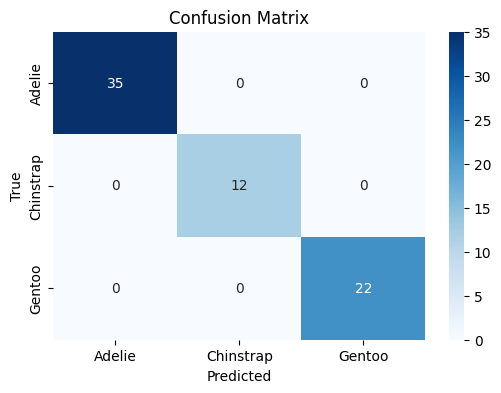

In [32]:
# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_encoder.inverse_transform(model.classes_), # Use model.classes_ instead
            yticklabels=species_encoder.inverse_transform(model.classes_))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_knn.png')

plt.show()

## Save Model and etc.

In [33]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_65130701932.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [34]:
import pickle
import pandas as pd

In [35]:

with open('model_penguin_65130701932.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

### New data

In [36]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [37]:
x_new['island'] = island_encoder.transform(x_new['island'])
x_new['sex'] = sex_encoder.transform(x_new['sex'])


### Predicting

In [38]:
y_pred_new = model.predict(x_new)

result = species_encoder.inverse_transform(y_pred_new)

print('Predicted Specie: ', result)

Predicted Specie:  ['Adelie']


### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_knn_penguin.py

In [39]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 1.8 MB/s eta 0:00:00


In [42]:
cd

/root


In [43]:
cd /content/drive/MyDrive/!!LabTest-Model-Deploy

/content/drive/MyDrive/!!LabTest-Model-Deploy


In [44]:
%%writefile app_predict_penguin_65130701932.py


import pickle
import pandas as pd
import streamlit as st

# โหลดโมเดลและตัวแปลงที่จำเป็น
with open('model_penguin_65130701932.pkl', 'rb') as file:
    model, species_encoder, island_encoder, sex_encoder = pickle.load(file)

# สร้างฟังก์ชันสำหรับทำนายผล
def predict_species(island, culmen_length, culmen_depth, flipper_length, body_mass, sex):
    # สร้าง DataFrame สำหรับข้อมูลใหม่
    x_new = pd.DataFrame({
        'island': [island],
        'culmen_length_mm': [culmen_length],
        'culmen_depth_mm': [culmen_depth],
        'flipper_length_mm': [flipper_length],
        'body_mass_g': [body_mass],
        'sex': [sex]
    })

    # แปลงค่าข้อมูลใหม่
    x_new['island'] = island_encoder.transform(x_new['island'])
    x_new['sex'] = sex_encoder.transform(x_new['sex'])

    # ทำนายผล
    y_pred_new = model.predict(x_new)
    result = species_encoder.inverse_transform(y_pred_new)

    return result[0]

# ตั้งค่าชื่อหัวข้อของแอป
st.title("Penguin Species Prediction")

# รับข้อมูลจากผู้ใช้
island = st.selectbox("Select Island", ['Torgersen', 'Biscoe', 'Dream'])
culmen_length = st.number_input("Culmen Length (mm)", min_value=0.0, max_value=100.0, value=37.0)
culmen_depth = st.number_input("Culmen Depth (mm)", min_value=0.0, max_value=100.0, value=19.3)
flipper_length = st.number_input("Flipper Length (mm)", min_value=0.0, max_value=300.0, value=192.3)
body_mass = st.number_input("Body Mass (g)", min_value=0, max_value=10000, value=3750)
sex = st.selectbox("Select Sex", ['MALE', 'FEMALE'])

# เมื่อผู้ใช้กดปุ่ม "Predict"
if st.button("Predict"):
    # ทำนายผล
    predicted_species = predict_species(island, culmen_length, culmen_depth, flipper_length, body_mass, sex)

    # แสดงผลลัพธ์
    st.write(f'Predicted Species: {predicted_species}')




Overwriting app_predict_penguin_65130701932.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [45]:
%%writefile requirements.txt

scikit-learn
pandas


Overwriting requirements.txt
